In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import mlflow
import mlflow.sklearn
import numpy as np

In [2]:
df = pd.read_csv('loan_data.csv')


In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [4]:
print("\nData info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB
None

Missing values:
 Loan_ID               0
Gender                5
Married               0
Depen

In [5]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
# Filling numeric columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Filling categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [6]:
# Numeric columns
print(df.describe())
# Categorical columns
print(df.describe(include='object'))


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       381.000000         381.000000  381.000000        381.000000   
mean       3579.845144        1277.275381  104.986877        341.417323   
std        1419.813818        2340.818114   28.358464         67.625957   
min         150.000000           0.000000    9.000000         12.000000   
25%        2600.000000           0.000000   90.000000        360.000000   
50%        3333.000000         983.000000  110.000000        360.000000   
75%        4288.000000        2016.000000  127.000000        360.000000   
max        9703.000000       33837.000000  150.000000        480.000000   

       Credit_History  
count      381.000000  
mean         0.850394  
std          0.357154  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
         Loan_ID Gender Married Dependents Education Self_Employed  \
count        381    381     381       

In [7]:
import matplotlib.pyplot as plt


In [8]:

# Approval rate for each credit history group
print(df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack())


Loan_Status            N         Y
Credit_History                    
0.0             0.947368  0.052632
1.0             0.172840  0.827160


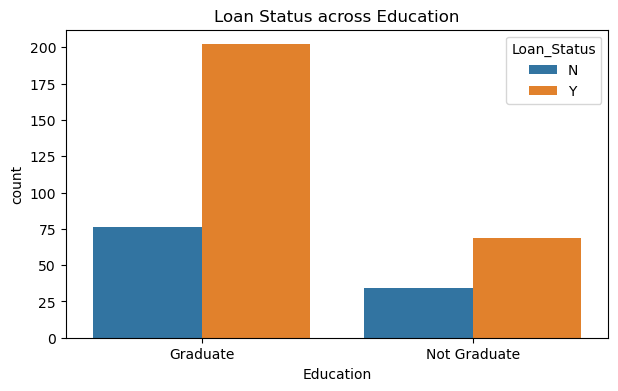

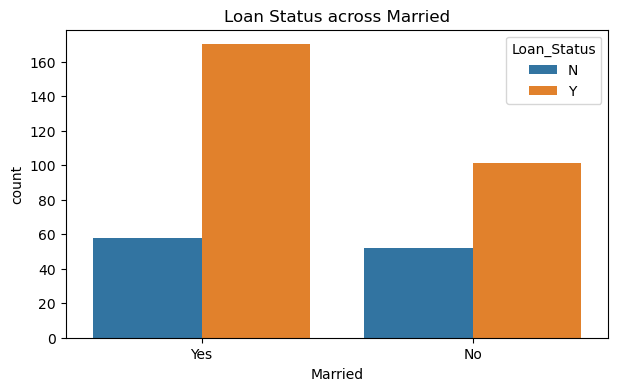

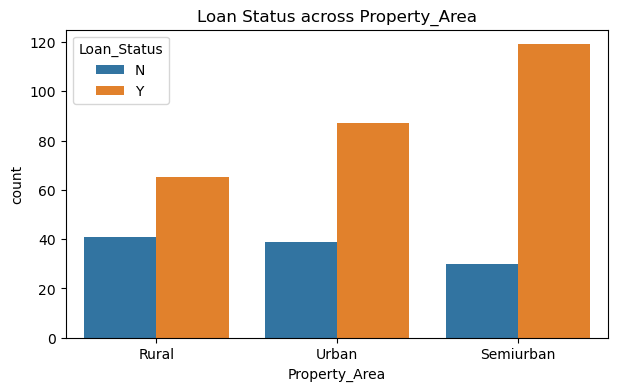

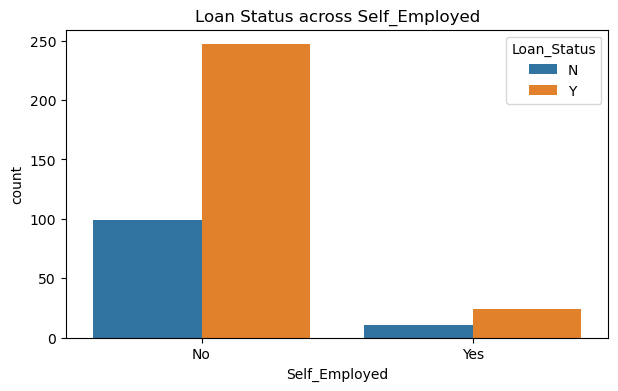

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Education', 'Married', 'Property_Area', 'Self_Employed']

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue='Loan_Status')
    plt.title(f'Loan Status across {col}')
    plt.show()


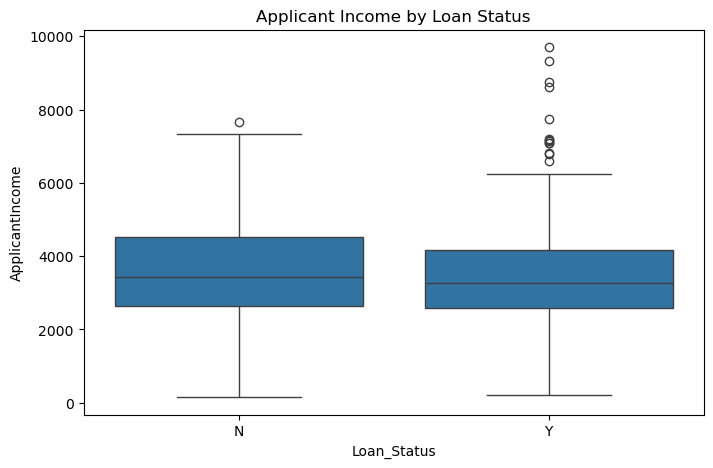

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Status')
plt.show()


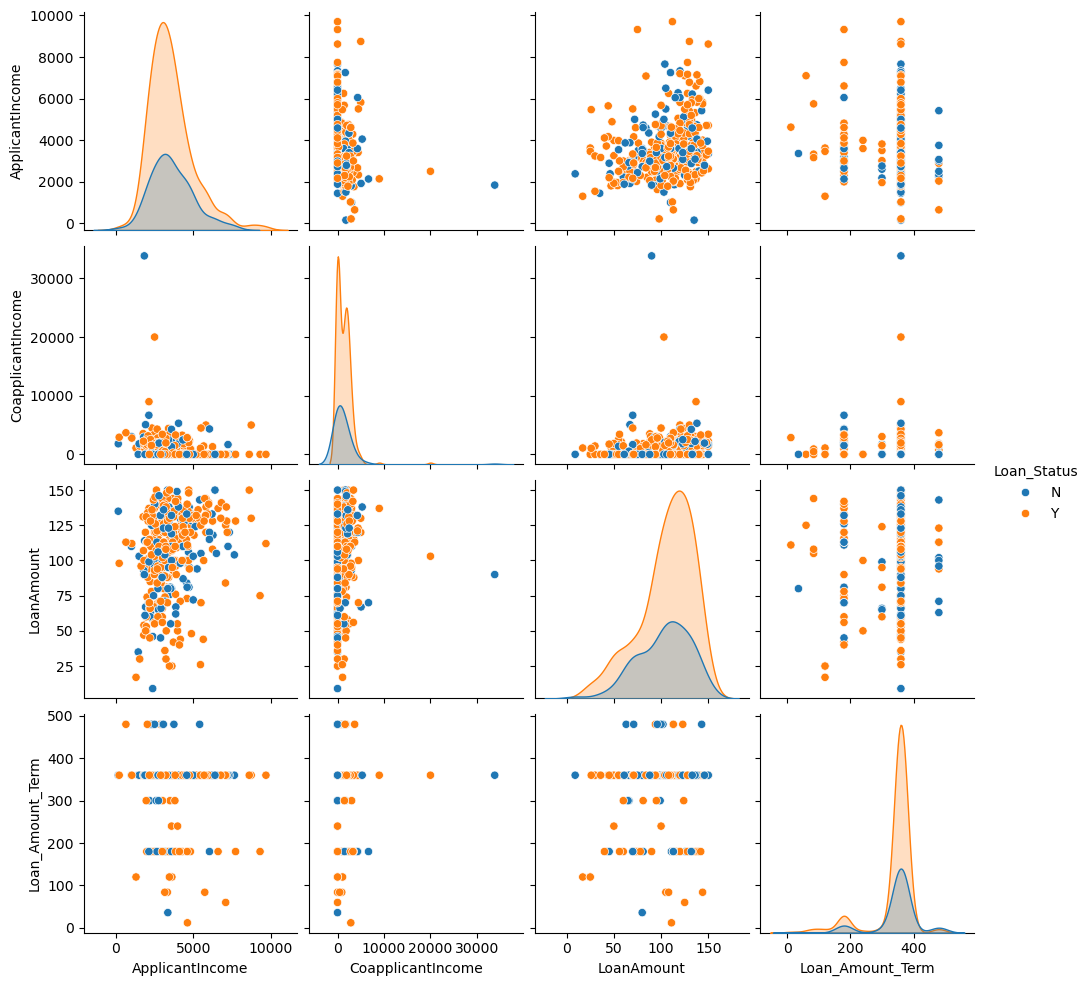

In [11]:
sns.pairplot(df, vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], hue='Loan_Status')
plt.show()


In [12]:
df = df.drop('Loan_ID', axis=1)
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [13]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,5703.0
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,5182.0
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0


In [23]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [25]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})



In [27]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
1,Male,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
2,Male,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
3,Male,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
4,Male,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,3849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,1,3+,0,0,5703,0.0,128.0,360.0,1.0,2,1,5703.0
377,Male,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1,5182.0
378,Female,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0
379,Male,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0


In [29]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [31]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,3849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3+,0,0,5703,0.0,128.0,360.0,1.0,2,1,5703.0
377,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1,5182.0
378,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0
379,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0


In [33]:
df['Log_Income'] = np.log1p(df['ApplicantIncome'])


In [35]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']  # This should be encoded 0/1


In [37]:
# Step 1: Replace '3+' with '3'
df['Dependents'] = df['Dependents'].replace('3+', '3')

# Step 2: Convert to numeric
df['Dependents'] = pd.to_numeric(df['Dependents'])



In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_Income
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.430327
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006701
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,7.857094
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699681
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,3849.0,7.755339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,5703,0.0,128.0,360.0,1.0,2,1,5703.0,8.648923
377,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1,5182.0,8.081166
378,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0,7.972811
379,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0,8.320448


In [41]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']  # This should be encoded 0/1


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_Income
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.430327
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006701
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,7.857094
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699681
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,3849.0,7.755339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,5703,0.0,128.0,360.0,1.0,2,1,5703.0,8.648923
377,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1,5182.0,8.081166
378,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0,7.972811
379,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0,8.320448


In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))


Accuracy: 0.8051948051948052
Confusion matrix:
 [[ 7 14]
 [ 1 55]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.80      0.98      0.88        56

    accuracy                           0.81        77
   macro avg       0.84      0.66      0.68        77
weighted avg       0.82      0.81      0.77        77



In [51]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_param("class_weight", "balanced")
    mlflow.log_param("random_state", 42)

    # Train model
    loan_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
    loan_model_balanced.fit(X_train, y_train)

    # Predict probabilities
    y_probs = loan_model_balanced.predict_proba(X_test)[:, 1]

    # Choose threshold
    threshold = 0.7
    y_pred_adjusted = (y_probs >= threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)

    # Log threshold and metrics
    mlflow.log_param("threshold", threshold)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_class_0", report['0']['f1-score'])
    mlflow.log_metric("f1_class_1", report['1']['f1-score'])

    # Log model
    mlflow.sklearn.log_model(loan_model_balanced, "random_forest_model")

    print(f"Logged MLflow run with threshold={threshold}, accuracy={accuracy:.4f}")


2025/10/22 00:17:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/22 00:17:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged MLflow run with threshold=0.7, accuracy=0.8442


In [53]:
import joblib

best_accuracy = 0.82  # initialize before runs

# After each run:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    joblib.dump(model, "best_loan_model.pkl")
    print(f"New best model saved with accuracy: {best_accuracy}")
else:
    print("Current model not better, not saved.")


New best model saved with accuracy: 0.8441558441558441
